### Bussiness Case

#### DataSets Attributes
Target variable → Bad_label
* 0 – Customer has Good credit history
* 1 – Customer has Bad credit history (falls into 30 DPD + bucket)

This data has three tables and each tables has there own columns :-
* __Cust_Account__   
* __Cust_Demographics__ 
* __Cust_Enquiry__  e_Enquiry

#### Preface
In bank Goodcredit, banks consider and evaluate every loan application based on merits. They check the creditworthiness of every individual or entity to determine the level of risk that they subject themself by lending to an entity or individual.Clients with a high level of risk are less desirable since they present with a high likelihood of defaulting on their loan obligations. Low-risk clients are more likely to get their loan applications approved since the lender considers them creditworthy.  

#### Domain Analysis
Bank credit analysis involves verifying and determining the creditworthiness of a potential client by looking at their financial state, credit reports, and business cash flows.The goal of credit analysis is to determine the level of default risk that a client presents to the company and the losses that the bank will suffer if the client defaults.The risk level that a client presents determines whether the bank will approve or reject the loan application, and if approved, the amount to be awarded.some of the major table this data has and every tables has there own important columns which are Customers Account, Customers Demographics and Customers Enquiry.

Cust_Account :- This table contains customer’s historical accounts data and payments history.

Cust_Demographics :- This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.

Cust_Enquiry :- Current customer applications with demographic data

Note that demographics features are renamed as features and obscured in accordance with privacy policies.

I will explain every necesseary columns when i'll do Data Cleaning.

#### Data Set Fields
For getting a Dataset we have to install pymysql and mysql connector. and the help of mysql i'm going to load dataset and convert into csv file then i'm going to work on this project.

#### python implimentation

In [3]:
# installing pymysql and mysql-connector package for making connections to database server

!pip install pymysql  
!pip install mysql-connector

In [4]:
import os               
import mysql.connector  
import pandas as pd     
import numpy as np    
import matplotlib.pyplot as plt
import seaborn as sns
# for ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [5]:
# Host: 18.136.157.135
# Port: 3306
# Username : dm_team1
# Password: DM!$Team&279@20!
# Database : project_banking

In [9]:
## making connections to database server
connection=mysql.connector.connect(host = "18.136.157.135",
                                  user='dm_team1',
                                  password='DM!$Team&279@20!')

In [10]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_banking',)


In [12]:
## connecting the database
connection=mysql.connector.connect(host='18.136.157.135',
                                  user='dm_team1',
                                  password='DM!$Team&279@20!',
                                  database='project_banking')

In [13]:
# getting all tables of bank goodcredit
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_banking
0              Cust_Account
1         Cust_Demographics
2              Cust_Enquiry


In [14]:
# put Cust_Account tables in variable
Cust_Account = pd.read_sql_query("Select * from Cust_Account",connection)

In [15]:
# put Cust_Demographics tables in variable
Cust_Demographics = pd.read_sql_query("Select * from Cust_Demographics",connection)

In [16]:
# put Cust_Enquiry tables in variable
# Don't need Customers enquriy for traing model so we are skip the tables
# we skip this tables because customers enquiry tables nevers contribute for checking credit score 
Cust_Enquiry = pd.read_sql_query("Select * from Cust_Enquiry",connection)

In [17]:
# run a code for showing all columns
pd.set_option('display.max_columns',None)
pd.reset_option('display.max_rows',None)

In [18]:
# This table contains customer’s historical accounts data and payments history.
Cust_Account

,dt_opened,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,11-Jun-15,1611,25-May-15,10,1,02-May-07,21-Apr-15,,30-Apr-15,24228,24228,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Apr-15,01-May-12,,,,,
186325,11-Jun-15,1611,25-May-15,10,1,11-Apr-07,22-Jun-09,02-Apr-10,30-Apr-15,19584,0,,"""""""000179146119089058029000XXX""""""",,01-Apr-10,01-Aug-09,,,,3,
186326,11-Jun-15,1611,25-May-15,10,1,20-Nov-06,,12-Apr-12,31-Dec-13,50844,0,,"""""""000XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",,01-Apr-12,01-Dec-10,,,,3,
186327,11-Jun-15,1611,25-May-15,10,1,17-Oct-06,,07-Mar-12,15-Apr-15,35587,0,,"""""""000010000000000000000000000000000XXXXXXXXXX...","""""""XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...",01-Mar-12,01-Apr-09,15000,6000,,3,


In [19]:
#  This table contains customer’s historical enquiry data such as enquiry amount and enquiry purpose.
Cust_Demographics

,dt_opened,customer_no,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,18-Apr-15,1,13-Apr-15,Insignia,13-Apr-15,650,2,Card Setup,14,500000,,,,Y,IS1,,0,159,4284,4284,,1,ADFPNXXXXX,03-Sep-65,98332XXXXX,N,@REDIFFMAIL.COM,1,2,,Mumbai / Navi Mumbai / Thane,400610,1965,0,Self,Y,2,90000,,,,0,0,0,0,Mumbai,400059,@CODOGNOTTO.NET,PAN Card,ADFPNXXXXX,The Ratnakar Bank Ltd.,,Y,State Bank of India,0,01-Jun-13,17-Jun-16,1,21,,Y,Y,N,,Y,1965-0,21,15,400610,0,2,90000,Nov-00,21,R,,,0000-00-00,0,98332XXXXX,1,N,0
1,21-Apr-15,2,21-Apr-15,Insignia,21-Apr-15,760,1,Card Setup,14,1200000,,,,Y,IS1,,0,91,B001,4077,,1,AJWPRXXXXX,14-Jul-62,99455XXXXX,N,@GMAIL.COM,1,2,,Bengaluru,560042,1969,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AJWPRXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,17,,Y,Y,N,,Y,1969-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,99455XXXXX,1,N,0
2,22-Apr-15,3,21-Apr-15,Insignia,21-Apr-15,774,1,Card Setup,14,700000,,,,Y,IS1,,0,91,B001,4077,,2,AFAPNXXXXX,10-Apr-66,98456XXXXX,N,@SHOBANARAYAN.COM,1,0,,Bengaluru,560042,1966,0,Self,Y,2,1,,,,0,0,0,0,Bangalore,560042,,PAN Card,AFAPNXXXXX,,,N,,0,,17-Jun-16,3,17,,N,Y,N,,Y,1966-0,17,12,560042,0,2,1,Nov-00,17,R,,,0000-00-00,0,98456XXXXX,1,N,0
3,25-Apr-15,4,15-Apr-15,Insignia,20-Apr-15,770,1,Card Setup,14,500000,,,,Y,IS1,,0,157,5107,5107,,1,AAAPDXXXXX,16-Apr-64,98220XXXXX,N,@VSNL.COM,1,3,,Pune,411001,1988,0,Self,Y,2,100000,,,,0,0,0,0,Pune,411026,@ALBAJ.COM,PAN Card,AAAPDXXXXX,The Ratnakar Bank Ltd.,,Y,HDFC Bank,0,,17-Jun-16,1,21,,Y,Y,N,,Y,1988-0,21,16,411001,0,2,100000,Nov-00,21,R,,,6/15/65,1,98220XXXXX,1,N,0
4,06-May-15,5,30-Apr-15,Insignia,,,3,Card Setup,14,500000,,,,Y,IS1,,0,100,D016,4564,,1,ABEPSXXXXX,03-Jan-54,98111XXXXX,N,@REDIFFMAIL.COM,1,3,,Gurgaon,122009,1995,0,Self,Y,2,300000,,,,0,0,0,0,Gurgaon,122009,,PAN Card,ABEPSXXXXX,The Ratnakar Bank Ltd.,,N,,0,,17-Jun-16,1,13,,Y,Y,N,,Y,1995-0,13,3,122009,0,2,300000,Nov-00,13,R,,,0000-00-00,0,98111XXXXX,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23891,31-Dec-15,23892,10-Dec-15,Platinum Deligh,10-Dec-15,704,1,Card Setup,14,119000,,,,Y,PD1,PD3,12,SA05,MA01,,,1,CUQPSXXXXX,12-Oct-88,98715XXXXX,N,@YAHOO.COM,2,0,Graduate,New Delhi,110045,1988,10,Paren,Y,1,33000,Private Ltd. Co.,Others,SERVICE ASSOCIATE,2015,6,0,6,Gurgaon,122001,,PAN Card,CUQPSXXXXX,,,Y,State Bank of India,99000,01-Jan-15,17-Jun-16,1,10,Y,N,Y,N,,Y,1988-10,10,157,110045,0,1,33000,0-0,13,R,Y,,0000-00-00,0,XXXXX,1,N,0
23892,17-Dec-15,23893,16-Nov-15,Platinum Deligh,,,2,Card Setup,14,35000,,,,Y,PD1,PD3,12,SA03,AS33,,,1,DTPPSXXXXX,01-Feb-87,99101XXXXX,N,@GMAIL.COM,2,0,Graduate,New Delhi,110037,2014,12,Rente,N,1,1,Private Ltd. Co.,Others,ENGINEER,2012,12,3,0,New Delhi,110037,@GMAIL.COM,PAN Card,DTPPSXXXXX,,,N,,0,,17-Jun-16,1,10,N,N,Y,N,,Y,2014-12,33,102,282001,1,1,1,0-0,10,O,Y,,0000-00-00,0,99101XXXXX,1,N,0
23893,04-Nov-15,23894,24-Sep-15,Platinum Maxima,24-Sep-15,748,3,Card 

In [20]:
# Current customer applications with demographic data
Cust_Enquiry

,dt_opened,customer_no,upload_dt,enquiry_dt,enq_purpose,enq_amt
0,18-Apr-15,1,21-Apr-15,19-Dec-14,2,3500000
1,18-Apr-15,1,21-Apr-15,05-Mar-14,5,500000
2,18-Apr-15,1,21-Apr-15,05-Mar-14,0,50000
3,18-Apr-15,1,21-Apr-15,22-Feb-14,10,50000
4,18-Apr-15,1,21-Apr-15,11-Jun-13,10,1000
...,...,...,...,...,...,...
413183,04-Dec-15,23896,09-Nov-15,22-Oct-11,5,200000
413184,04-Dec-15,23896,09-Nov-15,06-Jan-11,10,50000
413185,04-Dec-15,23896,09-Nov-15,01-Apr-10,10,50000
413186,04-Dec-15,23896,09-Nov-15,21-Feb-10,1,330000


In [21]:
# here i'm going to merge the all tables in one variables and making one dataset of two tables by using inner join
data = pd.merge(Cust_Account,Cust_Demographics,on ="customer_no",how="inner")

In [22]:
# that's we got dataset after mergeing.....
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900,0,,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",,01-Sep-15,01-Jul-14,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,,03-Oct-15,16201,10390,,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000,1400,,3,5603,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,,30-Sep-15,41028,34420,,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,,,,,,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683,3,Card Setup,14,56000,,,,Y,PM1,,,SA05,MA01,,,1,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1,0,MBA/MMS,New Delhi,110059,2006,0,Paren,Y,1,35000,Private Ltd. Co.,Others,SR EXE,2009,1,4,0,Gurgaon,122001,,PAN Card,ASWPKXXXXX,,,N,,0,,17-Jun-16,1,10,,N,Y,N,,Y,2006-0,10,157,110059,0,1,35000,0-0,13,R,,,0000-00-00,0,88009XXXXX,1,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,,26-Jul-07,31-Jan-09,93473,0,,"""""""1200900600600600300000000000000000000000000...",,01-Jul-07,01-Feb-06,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,,N,,0,,17-Jun-16,1,13,,N,Y,N,,Y,2009-0,13,39,121003,0,1,100000,0-0,13,R,,,0000-00-00,0,XXXXX,1,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,,31-May-15,20250,13500,,"""""""000000000000000""""""",,01-May-15,01-Jan-15,,,,,,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687,3,Card Setup,14,125000,,,,Y,PD1,PD3,12,SA35,S001,,,1,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1,2,Post-Graduate,Faridabad,121003,2009,0,Self,Y,1,100000,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013,1,2,0,Faridabad,121003,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indi

In [23]:
# To save mergeing dataset
data.to_csv("Bank_GoodCredits",index=False)

In [24]:
#data is in csv file so we have to call pd.read_csv from pandas
data = pd.read_csv("Bank_GoodCredits")# loading a dataset

In [25]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,closed_dt,reporting_dt,high_credit_amt,cur_balance_amt,amt_past_due,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,creditlimit,cashlimit,rateofinterest,paymentfrequency,actualpaymentamount,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,05-Jul-14,30-Sep-15,20900.0,0,NaN,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",NaN,01-Sep-15,01-Jul-14,NaN,NaN,NaN,NaN,NaN,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,NaN,03-Oct-15,16201.0,10390,NaN,"""""""0000000000000000000000000000000000000000000...","""""""000000000000000000000000000XXX0000000000000...",01-Oct-15,01-Nov-12,14000.0,1400.0,NaN,3.0,5603.0,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,NaN,30-Sep-15,41028.0,34420,NaN,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,NaN,NaN,NaN,NaN,NaN,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,NaN,NaN,NaN,Y,PM1,NaN,NaN,SA05,MA01,NaN,NaN,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,NaN,PAN Card,ASWPKXXXXX,NaN,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,10.0,NaN,N,Y,N,NaN,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,NaN,NaN,0000-00-00,0.0,88009XXXXX,1.0,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,26-Jul-07,31-Jan-09,93473.0,0,NaN,"""""""1200900600600600300000000000000000000000000...",NaN,01-Jul-07,01-Feb-06,NaN,NaN,NaN,NaN,NaN,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,NaN,NaN,NaN,Y,PD1,PD3,12.0,SA35,S001,NaN,NaN,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,@SUPERFASHIONINDIA.COM,PAN Card,AHRPMXXXXX,Indian Bank,NaN,N,NaN,0.0,NaN,17-Jun-16,1.0,13.0,NaN,N,Y,N,NaN,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,NaN,NaN,0000-00

#### Basic Checks

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186329 entries, 0 to 186328
Columns: 103 entries, dt_opened_x to Bad_label
dtypes: float64(38), int64(5), object(60)
memory usage: 146.4+ MB


In [28]:
data.describe()

,customer_no,acct_type,owner_indic,high_credit_amt,cur_balance_amt,amt_past_due,creditlimit,cashlimit,paymentfrequency,actualpaymentamount,feature_3,feature_4,feature_6,feature_7,feature_14,feature_19,feature_25,feature_26,feature_29,feature_30,feature_31,feature_34,feature_35,feature_39,feature_40,feature_41,feature_42,feature_44,feature_49,feature_52,feature_55,feature_56,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_74,feature_76,feature_78,Bad_label
count,186329.000000,186329.000000,186329.000000,1.774540e+05,1.863290e+05,8.760000e+02,4.885200e+04,35282.000000,63893.000000,4.105300e+04,165928.000000,186196.000000,186196.0,1.861960e+05,124941.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,1.861960e+05,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,9.230000e+02,1.861960e+05,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,186196.000000,1.861960e+05,186196.000000,197.000000,186196.000000,186196.000000,186329.000000
mean,11431.820447,8.403104,1.122128,1.756104e+05,7.640269e+04,2.583151e+04,7.552881e+04,20608.503401,2.996212,3.016616e+04,725.253929,2.317542,14.0,1.342736e+05,7.516028,1.039389,1.158897,0.854078,243023.732948,2000.282283,0.602790,1.282111,3.857880e+04,1445.992588,3.108456,5.966541,0.109755,246347.662506,2.779537e+11,8.348658e+04,1.070367,13.377924,14.250644,142.715445,275105.859116,0.137613,1.282111,3.857880e+04,14.281789,2.269036,0.005467,1.040860,0.035491
std,6730.432139,5.179466,0.567040,9.842643e+05,6.186783e+05,2.030680e+05,7.174109e+04,24856.481410,0.086954,3.870822e+05,37.150723,0.902129,0.0,9.177263e+04,5.805336,0.194518,0.365581,1.172739,171155.578951,12.698325,2.252566,0.453737,1.028723e+05,902.719609,3.559898,4.485362,0.786971,168705.840748,9.853658e+10,1.259489e+05,0.359427,8.519329,9.373645,179.549688,196264.878936,0.344494,0.453737,1.028723e+05,9.094427,0.498677,0.097677,0.220138,0.185018
min,1.000000,0.000000,1.000000,1.000000e+00,-7.355205e+06,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000e+00,-1.000000,1.000000,14.0,0.000000e+00,0.000000,1.000000,1.000000,0.000000,110001.000000,1964.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,7.568570e+05,0.000000e+00,1.000000,2.000000,2.000000,1.000000,110001.000000,0.000000,1.000000,1.000000e+00,2.000000,2.000000,0.000000,1.000000,0.000000
25%,5879.000000,6.000000,1.000000,2.297500e+04,0.000000e+00,1.535000e+02,3.100000e+04,7500.000000,3.000000,3.110000e+03,699.000000,1.000000,14.0,8.000000e+04,0.000000,1.000000,1.000000,0.000000,110056.000000,1990.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,110051.000000,3.090000e+11,0.000000e+00,1.000000,10.000000,10.000000,15.000000,110059.000000,0.000000,1.000000,1.000000e+00,10.000000,2.000000,0.000000,1.000000,0.000000
50%,11169.000000,10.000000,1.000000,4.522350e+04,0.000000e+00,1.209500e+03,6.000000e+04,12500.000000,3.000000,7.590000e+03,724.000000,3.000000,14.0,1.140000e+05,12.000000,1.000000,1.000000,0.000000,121004.000000,2005.000000,0.000000,1.000000,3.500000e+04,2008.000000,1.000000,7.000000,0.000000,122002.000000,3.090000e+11,5.500000e+04,1.000000,10.000000,10.000000,157.000000,201001.000000,0.000000,1.000000,3.500000e+04,10.000000,2.000000,0.000000,1.000000,0.000000
75%,16982.000000,10.000000,1.000000,1.060000e+05,2.099800e+04,7.663250e+03,1.000000e+05,27000.000000,3.000000,1.800000e+04,748.000000,3.000000,14.0,1.510000e+05,12.000000,1.000000,1.000000,2.000000,400090.000000,2011.000000,0.000000,2.000000,5.000000e+04,2012.000000,6.000000,11.000000,0.000000,400064.000000,3.090000e+11,1.130000e+05,1.000000,17.000000,21.000000,157.000000,411028.000000,0.000000,2.000000,5.000000e+04,21.000000,2.000000,0.000000,1.000000,0.000000
max,23896.000000,59.000000,4.000000,1.800000e+08,1.360100e+08,4.869309e+06,2.500000e+06,1000000.000000,3.000000,6.785322e+07,896.000000,3.000000,14.0,1.217000e+06,12.0

In [29]:
data.describe(include="O")

,dt_opened_x,upload_dt,opened_dt,last_paymt_dt,closed_dt,reporting_dt,paymenthistory1,paymenthistory2,paymt_str_dt,paymt_end_dt,rateofinterest,dt_opened_y,entry_time,feature_1,feature_2,feature_5,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_15,feature_16,feature_17,feature_18,feature_20,feature_21,feature_22,feature_23,feature_24,feature_27,feature_28,feature_32,feature_33,feature_36,feature_37,feature_38,feature_43,feature_45,feature_46,feature_47,feature_48,feature_50,feature_51,feature_53,feature_54,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_70,feature_72,feature_73,feature_75,feature_77,feature_79
count,186329,186329,185874,160842,77254,186329,186329,78505,186328,186328,24833.0,186329,186196,186196,165928,186196,10117,10117,3.710000e+02,186196,186196,78255,186117,186070,10004,208.0,186329,186196,186329,186196,180805,156093,186196,186196,186196,133980,133980,133980,186196,83136,185389,186329,45343,186196,103126,102286,186196,17237,186196,186196,186196,112,186196,186196,186196,186196,21570,186196,186329,186196
unique,197,75,6245,4510,4839,1877,18311,11911,233,234,1711.0,197,296,7,281,1,19,19,7.000000e+00,2,16,14,364,522,364,13.0,10610,8462,3251,2,721,10,62,5,2,9,11,5663,70,4472,5,11250,56,2,10,180,1,2,2,2,2,8,2,491,133,2,2,62,3124,2
top,16-Nov-15,21-Apr-15,13-Apr-12,05-Mar-15,05-Mar-12,31-Jul-15,"""""""0000000000000000000000000000000000000000000...","""""""0000000000000000000000000000000000000000000...",01-Jul-15,01-Jan-15,39.0,16-Nov-15,23-Oct-15,Platinum Maxima,19-Aug-15,Card Setup,ROTVR,Negative Office Tele Verification,3.090000e+11,Y,PM1,PD3,SA03,AS03,5622,180.0,AAIPKXXXXX,01-Jan-86,98100XXXXX,N,@GMAIL.COM,Graduate,New Delhi,Self,Y,Private Ltd. Co.,Banking/Financial Services,MANAGER,New Delhi,@GMAIL.COM,PAN Card,XXXXX,HDFC Bank,Y,HDFC Bank,01-Jun-14,17-Jun-16,Y,N,Y,N,GNWX-B,Y,2010-0,0-0,R,Y,0000-00-00,XXXXX,N
freq,4643,5128,514,1739,353,12654,44979,18956,16747,5640,4120.0,4643,1478,76014,1347,186196,2562,2562,3.070000e+02,177801,74160,59088,68912,9382,1764,69.0,173,176,1672,164440,112409,110025,87577,92451,160573,61860,97943,13716,70243,14618,176024,940,11421,103897,43844,4807,186196,16043,182223,177801,183578,40,186161,12813,134163,130100,15145,185399,16349,186166


#### Data Preprocessing

In [30]:
data.isnull().sum()

dt_opened_x      0
customer_no      0
upload_dt        0
acct_type        0
owner_indic      0
              ... 
feature_76     133
feature_77       0
feature_78     133
feature_79     133
Bad_label        0
Length: 103, dtype: int64

In [31]:
# here i'm running a loop which columns having >=40% missing value i'm append in new variable and drop that columns.
df = []
for i in data.columns:
    if (data[i].isnull().sum())/len(data)*100>=40:
        df.append(i)

In [32]:
print(df)

['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency', 'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18', 'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73', 'feature_74']


In [33]:
# droping columns which has >=40% missing value
data.drop(['closed_dt', 'amt_past_due', 'paymenthistory2', 'creditlimit', 'cashlimit', 'rateofinterest', 'paymentfrequency',
           'actualpaymentamount', 'feature_8', 'feature_9', 'feature_10', 'feature_13', 'feature_17', 'feature_18',
           'feature_45', 'feature_48', 'feature_49', 'feature_51', 'feature_53', 'feature_57', 'feature_61', 'feature_73',
           'feature_74'],axis=1,inplace=True)

In [34]:
data.shape

(186329, 80)

In [35]:
# checking duplicate rows
data.duplicated().sum()

2438

In [36]:
# dropping duplicated rows
data.drop_duplicates(inplace=True)

In [37]:
data.shape

(183891, 80)

In [38]:
data

,dt_opened_x,customer_no,upload_dt,acct_type,owner_indic,opened_dt,last_paymt_dt,reporting_dt,high_credit_amt,cur_balance_amt,paymenthistory1,paymt_str_dt,paymt_end_dt,dt_opened_y,entry_time,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_46,feature_47,feature_50,feature_52,feature_54,feature_55,feature_56,feature_58,feature_59,feature_60,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_75,feature_76,feature_77,feature_78,feature_79,Bad_label
0,10-Nov-15,12265,20-Oct-15,6,1,09-Jun-13,30-Jun-14,30-Sep-15,20900.0,0,"""""""STDSTDSTDXXXXXXXXXXXXXXXSTDXXXXXXXXXXXXXXXS...",01-Sep-15,01-Jul-14,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
1,10-Nov-15,12265,20-Oct-15,10,1,25-May-12,06-Sep-15,03-Oct-15,16201.0,10390,"""""""0000000000000000000000000000000000000000000...",01-Oct-15,01-Nov-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
2,10-Nov-15,12265,20-Oct-15,10,1,22-Mar-12,31-Aug-15,30-Sep-15,41028.0,34420,"""""""0000000000000000000000000000000000000000000...",01-Sep-15,01-Oct-12,10-Nov-15,15-Oct-15,Platinum Maxima,15-Oct-15,683.0,3.0,Card Setup,14.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,ASWPKXXXXX,15-Jun-84,88009XXXXX,N,@GMAIL.COM,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,2009.0,1.0,4.0,0.0,Gurgaon,122001.0,PAN Card,ASWPKXXXXX,N,0.0,17-Jun-16,1.0,10.0,N,Y,N,Y,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,0-0,13.0,R,0000-00-00,0.0,88009XXXXX,1.0,N,1
3,20-Jul-15,15606,09-Jul-15,10,1,13-Jan-06,NaN,31-Jan-09,93473.0,0,"""""""1200900600600600300000000000000000000000000...",01-Jul-07,01-Feb-06,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,PAN Card,AHRPMXXXXX,N,0.0,17-Jun-16,1.0,13.0,N,Y,N,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,0000-00-00,0.0,XXXXX,1.0,N,1
4,20-Jul-15,15606,09-Jul-15,6,1,18-Jan-15,05-May-15,31-May-15,20250.0,13500,"""""""000000000000000""""""",01-May-15,01-Jan-15,20-Jul-15,06-Jul-15,Platinum Deligh,06-Jul-15,687.0,3.0,Card Setup,14.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,AHRPMXXXXX,20-Jun-80,88009XXXXX,N,@YAHOO.COM,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,2013.0,1.0,2.0,0.0,Faridabad,121003.0,PAN Card,AHRPMXXXXX,N,0.0,17-Jun-16,1.0,13.0,N,Y,N,Y,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,0-0,13.0,R,0000-00-00,0.0,XXXXX,1.0,N,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [39]:
# now we are going to drop unnecessary columns

data.drop(["reporting_dt","paymenthistory1","dt_opened_y","entry_time","feature_2","feature_20","feature_21",
          "feature_22","feature_24","feature_46","feature_47","feature_54","feature_75","feature_77","last_paymt_dt","paymt_str_dt","paymt_end_dt","feature_5","feature_6","feature_62","feature_70",
           "feature_79","feature_39","dt_opened_x","upload_dt"],axis=1,inplace=True)

In [40]:
data

,customer_no,acct_type,owner_indic,opened_dt,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_11,feature_12,feature_14,feature_15,feature_16,feature_19,feature_23,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_42,feature_43,feature_44,feature_50,feature_52,feature_55,feature_56,feature_58,feature_59,feature_60,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_71,feature_72,feature_76,feature_78,Bad_label
0,12265,6,1,09-Jun-13,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
1,12265,10,1,25-May-12,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
2,12265,10,1,22-Mar-12,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,Y,PM1,NaN,SA05,MA01,1.0,N,1.0,0.0,MBA/MMS,New Delhi,110059.0,2006.0,0.0,Paren,Y,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,0.0,Gurgaon,122001.0,N,0.0,1.0,10.0,N,Y,N,2006-0,10.0,157.0,110059.0,0.0,1.0,35000.0,13.0,R,0.0,1.0,1
3,15606,10,1,13-Jan-06,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,N,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,0.0,Faridabad,121003.0,N,0.0,1.0,13.0,N,Y,N,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,13.0,R,0.0,1.0,1
4,15606,6,1,18-Jan-15,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,Y,PD1,12.0,SA35,S001,1.0,N,1.0,2.0,Post-Graduate,Faridabad,121003.0,2009.0,0.0,Self,Y,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,0.0,Faridabad,121003.0,N,0.0,1.0,13.0,N,Y,N,2009-0,13.0,39.0,121003.0,0.0,1.0,100000.0,13.0,R,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,1,02-May-07,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186325,1611,10,1,11-Apr-07,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186326,1611,10,1,20-Nov-06,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0
186327,1611,10,1,17-Oct-06,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,Y,TD1,0.0,BBOL,H004,1.0,N,1.0,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,0.0,Self,Y,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,0.0,Hyderabad,500003.0,N,0.0,1.0,2.0,N,Y,N,1995-0,2.0,14.0,500017.0,0.0,1.0,45800.0,2.0,R,0.0,1.0,0


In [41]:
# run a loop for getting all columns unique values

for i in data.columns:
    print(f"======= { i } ========\n")
    print(data[i].value_counts())

======= customer_no ========

customer_no
8814     76
11922    71
8872     68
51       66
8770     64
         ..
1743      1
20507     1
20427     1
21944     1
17698     1
Name: count, Length: 23896, dtype: int64
======= acct_type ========

acct_type
10    99092
6     25237
5     22629
1      9290
13     8478
2      5577
7      4161
0      3891
12     1188
32      735
51      719
3       665
15      492
17      405
8       404
53      377
4       184
52       97
54       71
35       54
9        50
31       26
59       22
55       17
56        8
34        5
33        5
14        5
11        4
16        2
57        1
Name: count, dtype: int64
======= owner_indic ========

owner_indic
1    175014
4      6177
2      1549
3      1151
Name: count, dtype: int64
======= opened_dt ========

opened_dt
13-Apr-12    503
31-Oct-14    472
31-Jan-15    339
30-Sep-14    331
31-Dec-14    329
            ... 
22-Apr-94      1
02-Apr-01      1
07-Oct-00      1
27-Aug-00      1
02-Jun-00      1
Name: co

In [42]:
# Now, i'm going to drop that columns which has no variety in values

data.drop(["owner_indic","feature_11","feature_19","feature_23","feature_25","feature_31","feature_33","feature_42",
          "feature_55","feature_58","feature_59","feature_60","feature_67","feature_76","feature_78","feature_52",],axis=1,inplace=True)

In [43]:
data

,customer_no,acct_type,opened_dt,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label
0,12265,6,09-Jun-13,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
1,12265,10,25-May-12,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
2,12265,10,22-Mar-12,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,PM1,NaN,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006-0,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1
3,15606,10,13-Jan-06,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009-0,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1
4,15606,6,18-Jan-15,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009-0,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,02-May-07,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186325,1611,10,11-Apr-07,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186326,1611,10,20-Nov-06,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0
186327,1611,10,17-Oct-06,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995-0,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0


#### Filling the null value and change data type

In [44]:
pd.reset_option('display.max_rows',None)

In [45]:
data.isnull().sum()

customer_no            0
acct_type              0
opened_dt            425
high_credit_amt     8712
cur_balance_amt        0
feature_1            124
feature_3          19651
feature_4            124
feature_7            124
feature_12           124
feature_14         60563
feature_15           183
feature_16           244
feature_26           124
feature_27         29723
feature_28           124
feature_29           124
feature_30           124
feature_32           124
feature_34           124
feature_35           124
feature_36         51603
feature_37         51603
feature_38         51603
feature_40           124
feature_41           124
feature_43           124
feature_44           124
feature_50           124
feature_56           124
feature_63           124
feature_64           124
feature_65           124
feature_66           124
feature_68           124
feature_69           124
feature_71           124
feature_72           124
Bad_label              0
dtype: int64

In [46]:
# Filling all null value by the help of Measure of Central Tendency


data.loc[data["opened_dt"].isnull(),"opened_dt"] = "13-Apr-12"
data.loc[data["high_credit_amt"].isnull(),"high_credit_amt"] = np.mean(data.high_credit_amt)
data.loc[data["feature_1"].isnull(),"feature_1"] = "Platinum Maxima"
data.loc[data["feature_3"].isnull(),"feature_3"] = 682.0
data.loc[data["feature_4"].isnull(),"feature_4"] = 3.000000
data.loc[data["feature_7"].isnull(),"feature_7"] = np.mean(data.feature_7)
data.loc[data["feature_12"].isnull(),"feature_12"] = "PM1"
data.loc[data["feature_14"].isnull(),"feature_14"] = 12.000000
data.loc[data["feature_15"].isnull(),"feature_15"] = "SA03"
data.loc[data["feature_16"].isnull(),"feature_16"] = "AS03"
data.loc[data["feature_26"].isnull(),"feature_26"] = 0.000000
data.loc[data["feature_27"].isnull(),"feature_27"] = "Graduate"
data.loc[data["feature_28"].isnull(),"feature_28"] = "New Delhi"
data.loc[data["feature_29"].isnull(),"feature_29"] = np.mean(data.feature_29)
data.loc[data["feature_30"].isnull(),"feature_30"] = 2010.0
data.loc[data["feature_32"].isnull(),"feature_32"] = "Self"
data.loc[data["feature_34"].isnull(),"feature_34"] = 2.0
data.loc[data["feature_35"].isnull(),"feature_35"] = 42759.59392727169
data.loc[data["feature_36"].isnull(),"feature_36"] = "Private Ltd. Co."
data.loc[data["feature_37"].isnull(),"feature_37"] = "Banking/Financial Services"
data.loc[data["feature_38"].isnull(),"feature_38"] = "MANAGER"
data.loc[data["feature_40"].isnull(),"feature_40"] = 0.0
data.loc[data["feature_41"].isnull(),"feature_41"] = 11.0
data.loc[data["feature_43"].isnull(),"feature_43"] = "New Delhi"
data.loc[data["feature_44"].isnull(),"feature_44"] = np.mean(data.feature_44)
data.loc[data["feature_50"].isnull(),"feature_50"] = "Y"
data.loc[data["feature_63"].isnull(),"feature_63"] = "2010-0"
data.loc[data["feature_64"].isnull(),"feature_64"] = 10.0
data.loc[data["feature_65"].isnull(),"feature_65"] = 157.0
data.loc[data["feature_66"].isnull(),"feature_66"] = np.mean(data.feature_66)
data.loc[data["feature_68"].isnull(),"feature_68"] = 1.0
data.loc[data["feature_69"].isnull(),"feature_69"] = np.mean(data.feature_69)
data.loc[data["feature_71"].isnull(),"feature_71"] = 10.0
data.loc[data["feature_72"].isnull(),"feature_72"] = "R"
data.loc[data["feature_56"].isnull(),"feature_56"] = 10.0

In [47]:
data.isnull().sum()

customer_no        0
acct_type          0
opened_dt          0
high_credit_amt    0
cur_balance_amt    0
feature_1          0
feature_3          0
feature_4          0
feature_7          0
feature_12         0
feature_14         0
feature_15         0
feature_16         0
feature_26         0
feature_27         0
feature_28         0
feature_29         0
feature_30         0
feature_32         0
feature_34         0
feature_35         0
feature_36         0
feature_37         0
feature_38         0
feature_40         0
feature_41         0
feature_43         0
feature_44         0
feature_50         0
feature_56         0
feature_63         0
feature_64         0
feature_65         0
feature_66         0
feature_68         0
feature_69         0
feature_71         0
feature_72         0
Bad_label          0
dtype: int64

In [48]:
# Converting Date columns in date formate using pd.to_datetime technique
def convert_into_datetime(columns):
    data[columns]=pd.to_datetime(data[columns])
    
# Converting the columns into Datetime using for loop
for i in ['opened_dt']:  
    convert_into_datetime(i) 
    
# Create the new columns with month 
data['opened_dt_year']=data['opened_dt'].dt.year

data.drop('opened_dt',axis=1,inplace=True)  # drop opened_dt columns because now it's not necessary
    

In [50]:
# here i'm going to split the feature_63 columns for getting only year

data.feature_63 = data['feature_63'].str.split('-',expand=True)[0]

In [51]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900.0,0,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2013
1,12265,10,16201.0,10390,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2012
2,12265,10,41028.0,34420,Platinum Maxima,683.0,3.0,56000.0,PM1,12.0,SA05,MA01,0.0,MBA/MMS,New Delhi,110059.0,2006.0,Paren,1.0,35000.0,Private Ltd. Co.,Others,SR EXE,1.0,4.0,Gurgaon,122001.0,N,10.0,2006,10.0,157.0,110059.0,1.0,35000.0,13.0,R,1,2012
3,15606,10,93473.0,0,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1,2006
4,15606,6,20250.0,13500,Platinum Deligh,687.0,3.0,125000.0,PD1,12.0,SA35,S001,2.0,Post-Graduate,Faridabad,121003.0,2009.0,Self,1.0,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1.0,2.0,Faridabad,121003.0,N,13.0,2009,13.0,39.0,121003.0,1.0,100000.0,13.0,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2007
186325,1611,10,19584.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2007
186326,1611,10,50844.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2006
186327,1611,10,35587.0,0,Titanium Deligh,746.0,3.0,138000.0,TD1,0.0,BBOL,H004,3.0,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995.0,Self,1.0,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0.0,11.0,Hyderabad,500003.0,N,2.0,1995,2.0,14.0,500017.0,1.0,45800.0,2.0,R,0,2006


In [54]:
data.loc[data["feature_3"]<500,"feature_3"]=np.median(data.feature_3)

In [55]:
# Change columns type according to their value some columns having object type but it should in int type 

data.high_credit_amt = data.high_credit_amt.astype(int)
data.feature_3 = data.feature_3.astype(int)
data.feature_4 = data.feature_4.astype(int)
data.feature_14 = data.feature_14.astype(int)
data.feature_26 = data.feature_26.astype(int)
data.feature_30 = data.feature_30.astype(int)
data.feature_34 = data.feature_34.astype(int)
data.feature_40 = data.feature_40.astype(int)
data.feature_44 = data.feature_41.astype(int)
data.feature_56 = data.feature_56.astype(int)
data.feature_63 = data.feature_63.astype(int)
data.feature_64 = data.feature_64.astype(int)
data.feature_65 = data.feature_65.astype(int)
data.feature_68 = data.feature_68.astype(int)
data.feature_71 = data.feature_71.astype(int)

In [56]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
3,15606,10,93473,0,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2006
4,15606,6,20250,13500,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186325,1611,10,19584,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186326,1611,10,50844,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006
186327,1611,10,35587,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006


#### EDA 

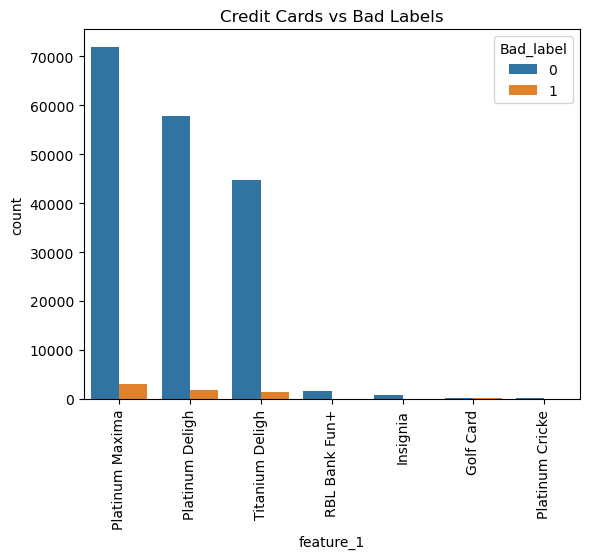

In [60]:
#assign countplot between feature_1 and Bad Labels

sns.countplot(x=data.feature_1,hue = data.Bad_label,data=data)  
plt.title("Credit Cards vs Bad Labels") 
plt.xticks(rotation=90) 
plt.show() 

#### Insights
- Most of the person having Platinum Maxima and Platinum Deligh Cards.
- person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
- person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score

<Axes: xlabel='feature_3', ylabel='Count'>

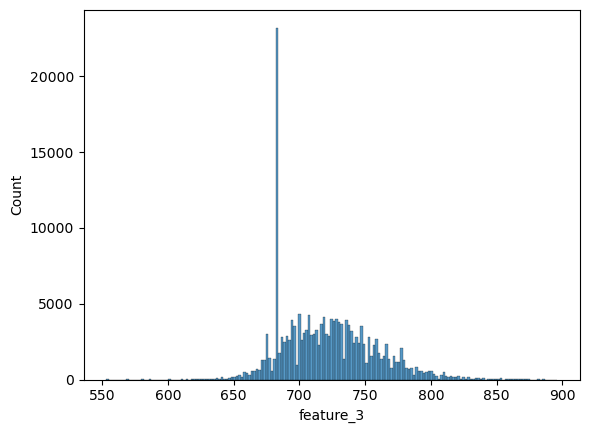

In [61]:
sns.histplot(data.feature_3)

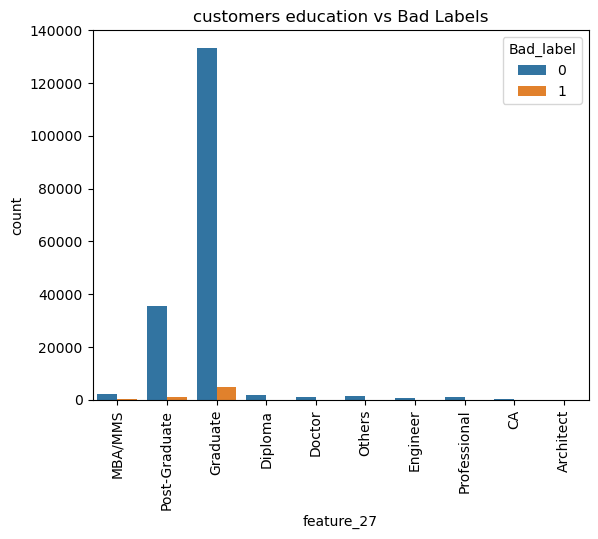

In [62]:
#assign countplot between feature_27 and Bad Labels
sns.countplot(x=data.feature_27,hue = data.Bad_label,data=data)
plt.title("customers education vs Bad Labels")
plt.xticks(rotation=90) 
plt.show()

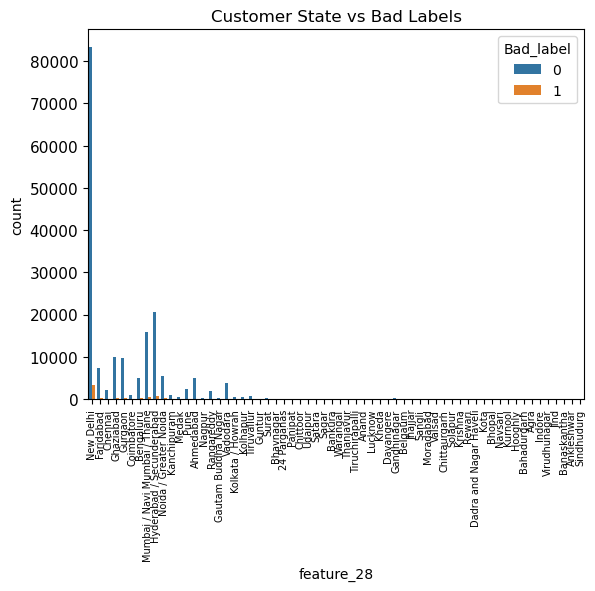

In [63]:
#assign countplot between feature_28 and Bad Labels

sns.countplot(x=data.feature_28,hue = data.Bad_label,data=data)
plt.title("Customer State vs Bad Labels") 
plt.xticks(fontsize = 7,rotation = 90)
plt.yticks(fontsize = 11)
plt.show()

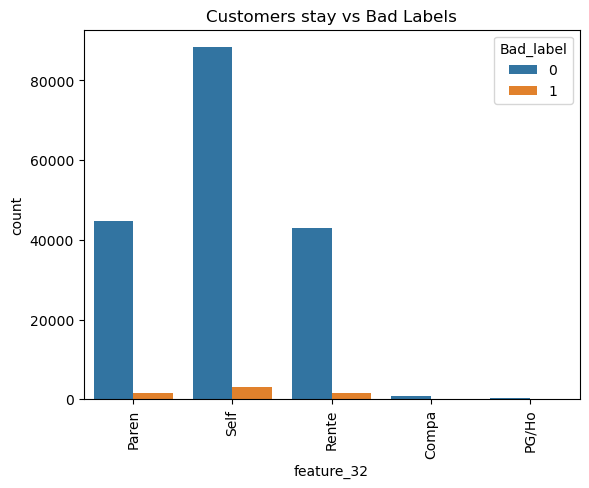

In [65]:
#assign countplot between feature_32 and Bad Labels

sns.countplot(x=data.feature_32,hue = data.Bad_label,data=data)
plt.title("Customers stay vs Bad Labels") 
plt.xticks(rotation=90)
plt.show()

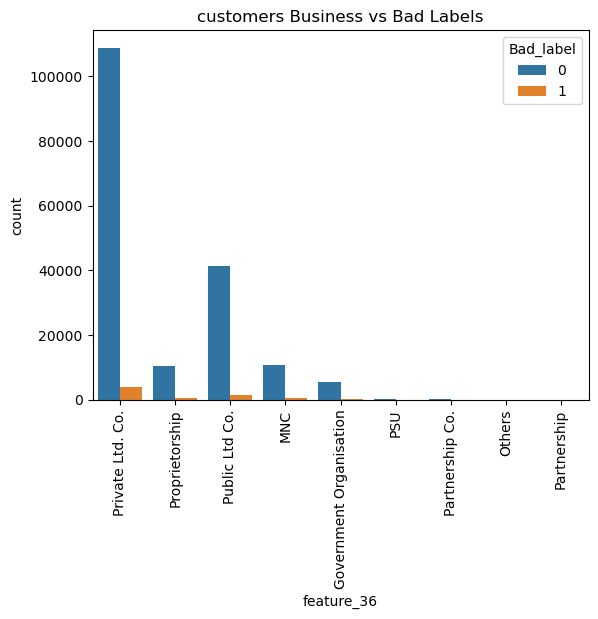

In [67]:
 #assign countplot between feature_36 and Bad Labels

sns.countplot(x=data.feature_36,hue = data.Bad_label,data=data)
plt.title("customers Business vs Bad Labels") 
plt.xticks(rotation=90)
plt.show()

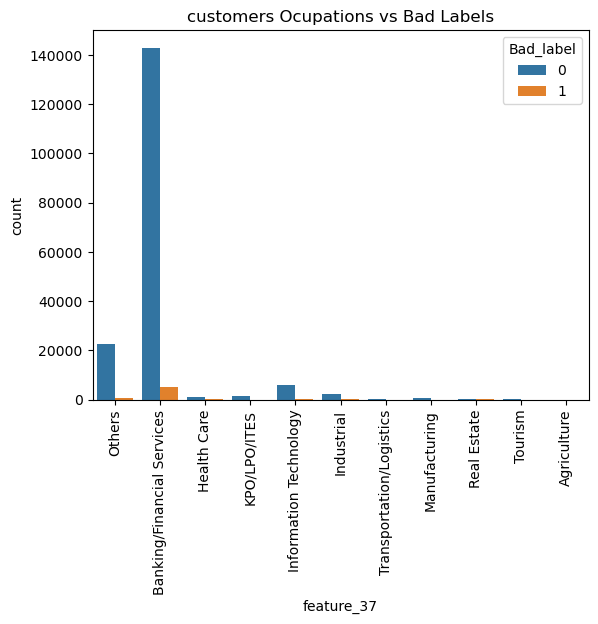

In [69]:
#assign countplot between feature_37 and Bad Labels
sns.countplot(x=data.feature_37,hue = data.Bad_label,data=data) 
plt.title("customers Ocupations vs Bad Labels")
plt.xticks(rotation=90)
plt.show()

#### Final Conclusions of Insights
* Most of the person having Platinum Maxima and Platinum Deligh Cards.
* Person who has Golf Card they having 50-50 chance of good or bad Credit Score (bad or good labels).
* Person who have RBL bank Fun+,Insignia and Platinum Cricke Cards they have perfect credit score.
* Most of the customers have good credit score.
* Few chance of that customers who has completed Post Graduate, Graduate and MBA/MMS their Credit score are Bad.
* Most of the Customers belong from New Delhi.
* Most of the Customer having Credit Cards who belong from Private Ltd.Co.
* Customers who started their bussiness in Partership they maintain their credit score.
* Most chance of that Customers who doing job in Banking/Financial services they taking credit cards.
* Most of the customers who has crdit cards they stay at their on home.

In [71]:
data

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_43,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
0,12265,6,20900,0,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2013
1,12265,10,16201,10390,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
2,12265,10,41028,34420,Platinum Maxima,683,3,56000.0,PM1,12,SA05,MA01,0,MBA/MMS,New Delhi,110059.0,2006,Paren,1,35000.0,Private Ltd. Co.,Others,SR EXE,1,4.0,Gurgaon,4,N,10,2006,10,157,110059.0,1,35000.0,13,R,1,2012
3,15606,10,93473,0,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2006
4,15606,6,20250,13500,Platinum Deligh,687,3,125000.0,PD1,12,SA35,S001,2,Post-Graduate,Faridabad,121003.0,2009,Self,1,100000.0,Private Ltd. Co.,Banking/Financial Services,GENRAL MANAGER OPERATIONS,1,2.0,Faridabad,2,N,13,2009,13,39,121003.0,1,100000.0,13,R,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186325,1611,10,19584,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2007
186326,1611,10,50844,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006
186327,1611,10,35587,0,Titanium Deligh,746,3,138000.0,TD1,0,BBOL,H004,3,Post-Graduate,Hyderabad / Secunderabad,500017.0,1995,Self,1,45800.0,Private Ltd. Co.,Banking/Financial Services,MANAGER,0,11.0,Hyderabad,11,N,2,1995,2,14,500017.0,1,45800.0,2,R,0,2006


#### Checking Outliers

In [72]:
# getting that columns which type are integers

df = data.select_dtypes(include='int')

In [73]:
df

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_3,feature_4,feature_14,feature_26,feature_30,feature_34,feature_40,feature_44,feature_56,feature_63,feature_64,feature_65,feature_68,feature_71,Bad_label,opened_dt_year
0,12265,6,20900,0,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2013
1,12265,10,16201,10390,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2012
2,12265,10,41028,34420,683,3,12,0,2006,1,1,4,10,2006,10,157,1,13,1,2012
3,15606,10,93473,0,687,3,12,2,2009,1,1,2,13,2009,13,39,1,13,1,2006
4,15606,6,20250,13500,687,3,12,2,2009,1,1,2,13,2009,13,39,1,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228,24228,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2007
186325,1611,10,19584,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2007
186326,1611,10,50844,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2006
186327,1611,10,35587,0,746,3,0,3,1995,1,0,11,2,1995,2,14,1,2,0,2006


In [75]:
df.columns

Index(['customer_no', 'acct_type', 'high_credit_amt', 'cur_balance_amt',
       'feature_3', 'feature_4', 'feature_14', 'feature_26', 'feature_30',
       'feature_34', 'feature_40', 'feature_44', 'feature_56', 'feature_63',
       'feature_64', 'feature_65', 'feature_68', 'feature_71', 'Bad_label',
       'opened_dt_year'],
      dtype='object')

<Axes: ylabel='high_credit_amt'>

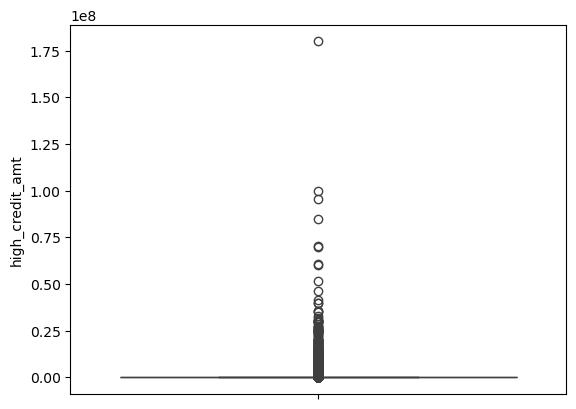

In [76]:
# asign boxplot of high credit amount for checking outliers

sns.boxplot(data.high_credit_amt)  

In [77]:
# fixed outliers with Measure of central tendency

data.loc[data["high_credit_amt"]>100000000,"high_credit_amt"] = np.mean(data.high_credit_amt)

<Axes: ylabel='cur_balance_amt'>

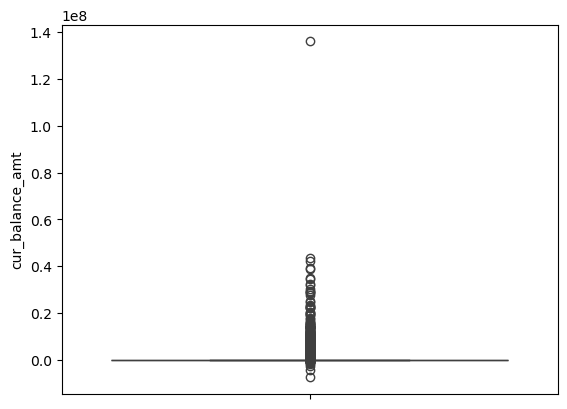

In [78]:
# asign boxplot of current balance amount for checking outliers

sns.boxplot(data.cur_balance_amt)

In [79]:
# fixed outliers with Measure of central tendency

data.loc[data["cur_balance_amt"]>130000000,"cur_balance_amt"] = np.mean(data.cur_balance_amt)

#### Conversion of categorical variables

#### Feature_1

In [80]:
data.feature_1.value_counts()

feature_1
Platinum Maxima    74978
Platinum Deligh    59682
Titanium Deligh    46016
RBL Bank Fun+       1644
Insignia             865
Golf Card            403
Platinum Cricke      303
Name: count, dtype: int64

In [81]:
# encoding 
data.feature_1 = data.feature_1.replace({"Platinum Cricke":0,"Golf Card":1,"Insignia":2,"RBL Bank Fun+":3,"Titanium Deligh":4,
                                        "Platinum Deligh":5,"Platinum Maxima":6})

#### Feature_27

In [82]:
data.feature_27.value_counts()

feature_27
Graduate         138359
Post-Graduate     36573
MBA/MMS            2325
Diploma            1837
Others             1501
Doctor             1242
Professional       1070
Engineer            621
CA                  339
Architect            24
Name: count, dtype: int64

In [83]:
# encoding of feature_27

data.feature_27 = data.feature_27.replace({"Architect":0,"CA":1,"Engineer":2,"Professional":3,"Doctor":4,"Others":5,
                                           "Diploma":6,"MBA/MMS":7,"Post-Graduate":8,"Graduate":9})

#### Feature_32

In [84]:
data.feature_32.value_counts()

feature_32
Self     91398
Paren    46436
Rente    44698
Compa     1044
PG/Ho      315
Name: count, dtype: int64

In [85]:
#encoding of feature_32
data.feature_32 = data.feature_32.replace({"PG/Ho":0,"Compa":1,"Rente":2,"Paren":3,"Self":4})

#### Feature_36

In [86]:
data.feature_36.value_counts()

feature_36
Private Ltd. Co.           112743
Public Ltd Co.              42735
MNC                         11136
Proprietorship              11018
Government Organisation      5846
Partnership Co.               178
PSU                           176
Partnership                    54
Others                          5
Name: count, dtype: int64

In [87]:
# feature_36
data.feature_36 = data.feature_36.replace({"Others":0,"Partnership":1,"PSU":2,"Partnership Co.":3,"Government Organisation":4,
                                          "Proprietorship":5,"MNC":6,"Public Ltd Co.":7,"Private Ltd. Co.":8})

#### Feature_37

In [88]:
data.feature_37.value_counts()

feature_37
Banking/Financial Services    148232
Others                         23390
Information Technology          6013
Industrial                      2147
KPO/LPO/ITES                    1513
Health Care                     1209
Manufacturing                    522
Transportation/Logistics         408
Real Estate                      258
Tourism                          185
Agriculture                       14
Name: count, dtype: int64

In [89]:
# encoding of feature 37
data.feature_37 = data.feature_37.replace({"Agriculture":0,"Tourism":1,"Real Estate":2,"Transportation/Logistics":3,"Manufacturing":4,
                                          "Health Care":5,"KPO/LPO/ITES":6,"Industrial":7,"Information Technology":8,"Others":9,
                                          "Banking/Financial Services":10})

#### Feature_72

In [90]:
data.feature_72.value_counts()

feature_72
R    128537
O     55354
Name: count, dtype: int64

In [91]:
#encoding of feature 72
data.feature_72 = data.feature_72.replace({"O":0,"R":1})

#### Feature_12

In [92]:
data.feature_12.value_counts()

feature_12
PM1    73144
PD1    59531
TD1    45674
PM2     1815
PB1     1587
IS1      741
GO1      403
TD2      343
DD1      279
PD2      150
IS2      124
PB2       57
DD2       24
PM3       16
PM4        2
PD3        1
Name: count, dtype: int64

#### feature_50

In [93]:
data.feature_50.value_counts()

feature_50
Y    102546
N     81345
Name: count, dtype: int64

In [94]:
# encoding of feature 50

data.feature_50 = data.feature_50.replace({"N":0,"Y":1})

In [95]:
from sklearn.preprocessing import LabelEncoder  # assign label encoder for change categorical value into numerical
le = LabelEncoder()

In [96]:
data.feature_12 = le.fit_transform(data.feature_12)
data.feature_15 = le.fit_transform(data.feature_15)
data.feature_16 = le.fit_transform(data.feature_16)
data.feature_28 = le.fit_transform(data.feature_28)
data.feature_38 = le.fit_transform(data.feature_38)

In [97]:
#  drop feature_43 variable because feature_28 and feature_43 are giving us same information.

data.drop("feature_43",axis=1,inplace=True)

#### Feature Selection

In [98]:
 # checking corelation
data.corr() 

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_41,feature_44,feature_50,feature_56,feature_63,feature_64,feature_65,feature_66,feature_68,feature_69,feature_71,feature_72,Bad_label,opened_dt_year
customer_no,1.000000,0.002620,-0.012981,-0.004717,0.294667,0.025044,-0.214869,-0.020007,-0.836574,0.384075,0.195424,-0.060657,-0.306869,0.016232,0.091399,-0.227594,-0.035481,-0.034164,0.003752,-0.062705,-0.041673,-0.056465,-0.004650,-0.010859,-0.027864,-0.027864,-0.090895,0.042654,-0.035481,0.056193,0.053702,-0.162787,0.003349,-0.062713,0.061212,-0.024418,-0.007948,0.030459
acct_type,0.002620,1.000000,-0.077414,-0.096352,-0.005649,-0.033725,0.006518,-0.003797,0.000861,-0.001586,-0.007305,0.000859,-0.010376,0.001733,-0.008561,0.011519,-0.009029,-0.008611,0.025704,-0.004564,0.022901,-0.002679,-0.002086,-0.011411,-0.034768,-0.034768,0.041353,0.001359,-0.009029,0.003247,0.004171,0.013652,0.025738,-0.004564,0.006804,-0.005496,-0.005122,-0.048139
high_credit_amt,-0.012981,-0.077414,1.000000,0.687896,-0.014475,0.056716,-0.002310,0.036154,-0.022938,-0.023295,-0.025493,-0.011548,0.011698,-0.019718,-0.009347,0.003996,-0.008974,0.032985,0.051782,0.029372,0.016770,0.008820,-0.003916,-0.027715,-0.027824,-0.027824,-0.012968,0.031364,-0.008974,0.021980,-0.019296,-0.007187,0.051838,0.029373,0.023286,0.001696,0.011339,0.027138
cur_balance_amt,-0.004717,-0.096352,0.687896,1.000000,-0.005116,0.040225,-0.001379,0.007984,-0.014474,-0.015166,-0.010696,-0.006700,0.003498,-0.011980,-0.008134,0.001189,0.006659,0.019721,0.028858,0.018662,0.009722,0.005539,-0.001999,-0.012745,-0.017508,-0.017508,-0.014429,0.026141,0.006659,0.019776,-0.010926,-0.005321,0.028936,0.018663,0.021132,0.000390,0.004049,0.081156
feature_1,0.294667,-0.005649,-0.014475,-0.005116,1.000000,-0.012258,-0.042030,-0.038656,-0.261069,0.372548,0.013350,0.043843,-0.112638,-0.006507,0.003601,0.013878,0.002966,-0.020809,0.060584,0.009002,0.006041,-0.002325,0.005415,-0.024820,-0.045752,-0.045752,0.003376,-0.002812,0.002966,-0.002946,0.008396,0.008935,0.059146,0.008974,-0.012313,-0.003023,0.008832,0.032332
feature_3,0.025044,-0.033725,0.056716,0.040225,-0.012258,1.000000,-0.203041,0.340509,-0.028536,0.023719,0.037882,-0.074658,0.035229,-0.009809,0.017947,-0.061619,-0.075684,0.122907,0.124679,0.055915,0.024557,0.030380,-0.021913,-0.104955,-0.021252,-0.021252,0.000395,0.067023,-0.075684,0.041513,-0.072618,-0.100618,0.126353,0.055944,0.042241,0.049978,-0.048263,-0.247929
feature_4,-0.214869,0.006518,-0.002310,-0.001379,-0.042030,-0.203041,1.000000,-0.066348,0.115123,0.094484,0.153794,-0.159523,0.217240,-0.070308,0.025362,-0.155481,0.028354,0.056615,-0.063019,0.015744,0.006178,0.046598,0.008872,-0.005718,0.035795,0.035795,0.105354,0.019518,0.028354,0.043110,0.083335,-0.097910,-0.064193,0.015724,0.036571,-0.028937,0.012696,0.012168
feature_7,-0.020007,-0.003797,0.036154,0.007984,-0.038656,0.340509,-0.066348,1.000000,-0.075191,-0.020288,-0.055413,-0.053703,0.079718,-0.002243,-0.023503,0.010429,-0.060146,0.095415,0.088941,0.095608,0.038779,0.029794,0.006308,-0.067519,0.007407,0.007407,0.214929,0.045331,-0.060146,0.028304,-0.054489,-0.020599,0.089005,0.095608,0.025879,0.041011,-0.059830,-0.238501
feature_12,-0.836574,0.000861,-0.022938,-0.014474,-0.261069,-0.028536,0.115123,-0.075191,1.000000,-0.420164,-0.140428,0.092972,0.127253,-0.002222,-0.089538,0.220102,0.055754,-0.045446,-0.048859,0.031656,0.016937,0.004347,0.008113,0.059697,0.054482,0.054482,0.051504,-0.073320,0.055754,-0.084714,-0.032892,0.162648,-0.048931,0.031655,-0.089368,0.023258,-0.012057,0.031235
feature_14,0.384075,-0.001586,-0.023295,-0.015166,0.372548,0.023719,0.094484,-0.020288,-0.420164,1.000000,0.370356,-0.172837,-0.004556,0.062858,0.110203,-0.414507,-0.043192,0.056884,0.012143,-0.065598,0.006216,0.017217,-0.00

<Axes: >

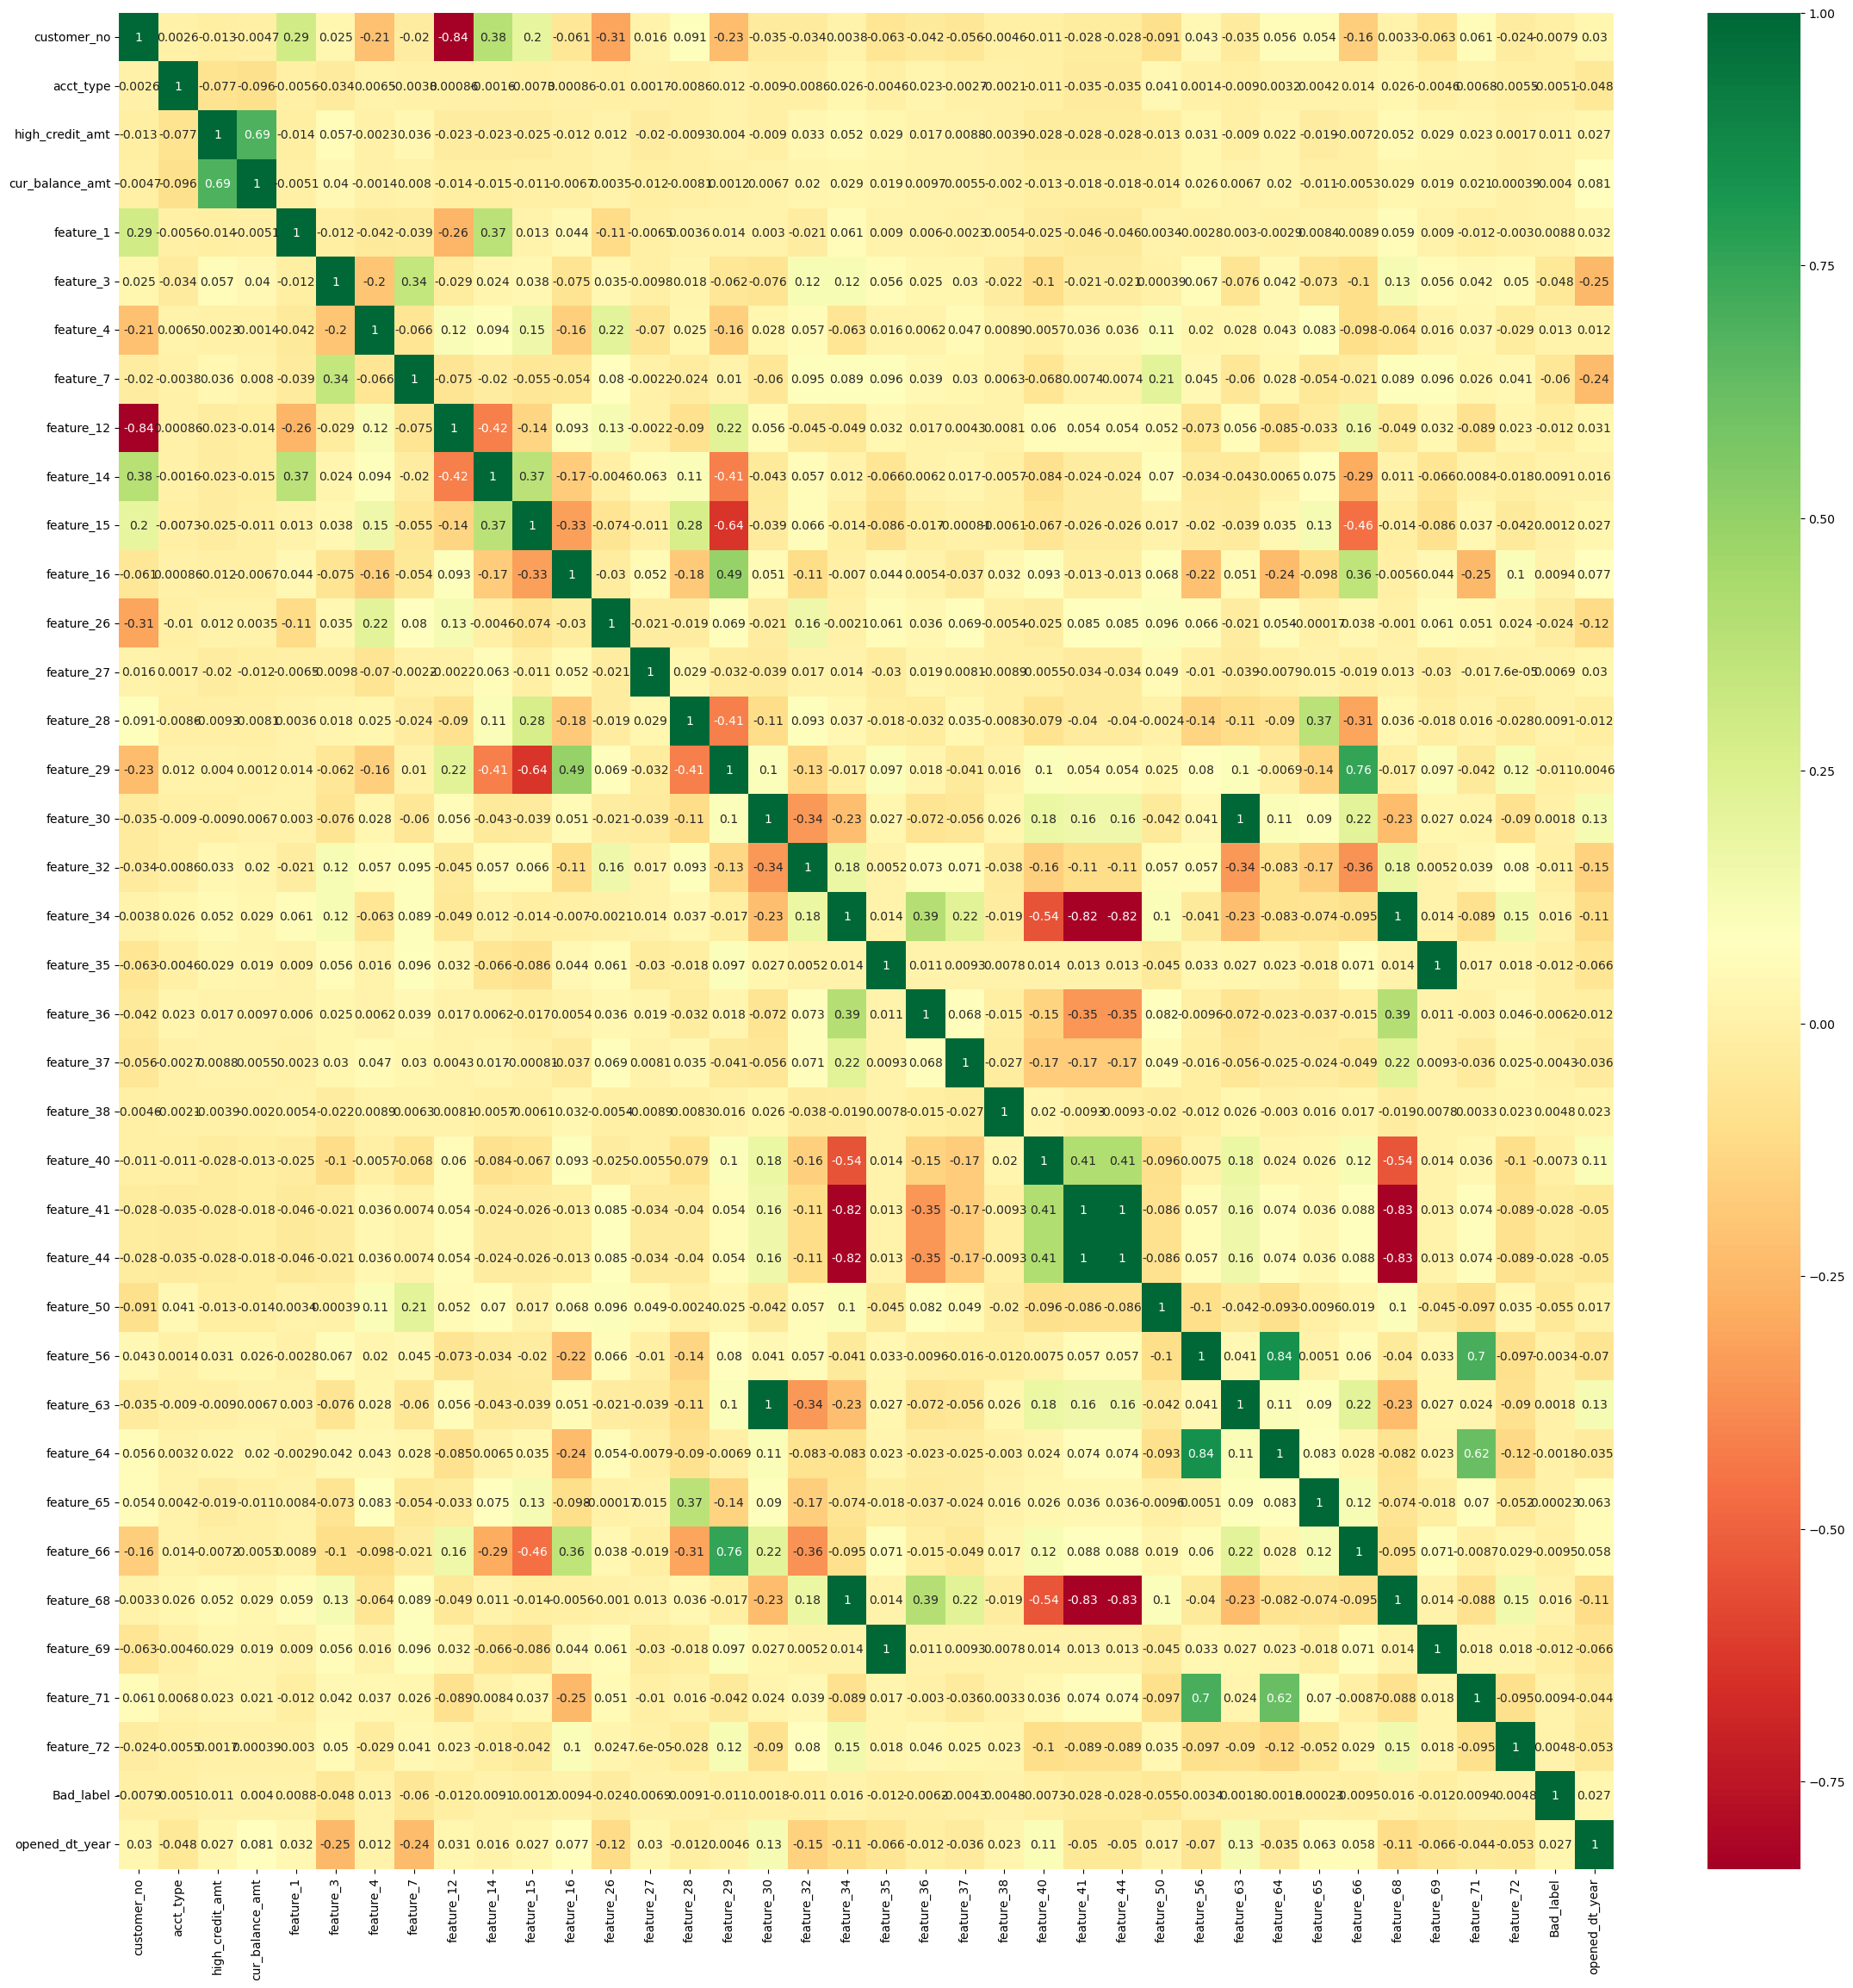

In [99]:
# corelation between each and every columns by plot heatmap

plt.figure(figsize=(28,28))
sns.heatmap(data.corr(),annot=True,cmap="RdYlGn")

In [100]:
# droping columns because of highly correlated
data.drop(["feature_63","feature_68","feature_69","feature_41"],axis=1,inplace=True) 

In [101]:
# Now selecting independent variable and dependent variables

x = data.drop("Bad_label",axis=1)
x

,customer_no,acct_type,high_credit_amt,cur_balance_amt,feature_1,feature_3,feature_4,feature_7,feature_12,feature_14,feature_15,feature_16,feature_26,feature_27,feature_28,feature_29,feature_30,feature_32,feature_34,feature_35,feature_36,feature_37,feature_38,feature_40,feature_44,feature_50,feature_56,feature_64,feature_65,feature_66,feature_71,feature_72,opened_dt_year
0,12265,6,20900.0,0.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2013
1,12265,10,16201.0,10390.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2012
2,12265,10,41028.0,34420.0,6,683,3,56000.0,10,12,303,360,0,7,42,110059.0,2006,3,1,35000.0,8,9,4509,1,4,0,10,10,157,110059.0,13,1,2012
3,15606,10,93473.0,0.0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,4,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,2006
4,15606,6,20250.0,13500.0,5,687,3,125000.0,7,12,322,427,2,8,18,121003.0,2009,4,1,100000.0,8,10,2019,1,2,0,13,13,39,121003.0,13,1,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186324,1611,10,24228.0,24228.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2007
186325,1611,10,19584.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2007
186326,1611,10,50844.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2006
186327,1611,10,35587.0,0.0,4,746,3,138000.0,14,0,119,287,3,8,25,500017.0,1995,4,1,45800.0,8,10,2629,0,11,0,2,2,14,500017.0,2,1,2006


In [102]:
y = data.Bad_label
y

0         1
1         1
2         1
3         1
4         1
         ..
186324    0
186325    0
186326    0
186327    0
186328    0
Name: Bad_label, Length: 183891, dtype: int64

#### Model Creation

In [103]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=43) 

#### Data Balancing

In [104]:
#target variable are not balanced so we have to balanced this for avoiding overfitting and underfitting
data.Bad_label.value_counts()

Bad_label
0    177411
1      6480
Name: count, dtype: int64

In [105]:
from imblearn.over_sampling import SMOTE  
sm = SMOTE()
x_sm,y_sm = sm.fit_resample(x_train,y_train)

#### Model Selection

In [109]:
from sklearn.metrics import auc, accuracy_score,roc_curve,roc_auc_score,r2_score,f1_score,precision_score,recall_score,confusion_matrix,classification_report

#### LogisticRegression 

In [106]:
from sklearn.linear_model import LogisticRegression  
lr = LogisticRegression()
lr.fit(x_sm,y_sm) 

LogisticRegression()

In [107]:
y_pred = lr.predict(x_test)
y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [110]:
acc_lr = accuracy_score(y_pred,y_test) 
acc_lr

0.5594805646792682

In [111]:
f1_lr = f1_score(y_pred,y_test,average="weighted") # checking f1 score
f1_lr

0.43153583769478243

In [112]:
confusion_matrix(y_pred,y_test)

array([[24680,   575],
       [19677,  1041]], dtype=int64)

In [114]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.56      0.98      0.71     25255
           1       0.64      0.05      0.09     20718

    accuracy                           0.56     45973
   macro avg       0.60      0.51      0.40     45973
weighted avg       0.60      0.56      0.43     45973



#### Decision Tree Classifier

In [115]:
from sklearn.tree import DecisionTreeClassifier   
dt = DecisionTreeClassifier()                    
dt.fit(x_sm,y_sm)

DecisionTreeClassifier()

In [117]:
y_pred_dt=dt.predict(x_test) 
y_pred_dt


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [118]:

acc_dt = accuracy_score(y_pred_dt,y_test) 
acc_dt

0.9853174689491658

In [119]:
f1_dt = f1_score(y_pred_dt,y_test)
f1_dt

0.8122392211404729

In [120]:
confusion_matrix(y_pred_dt,y_test)


array([[43838,   156],
       [  519,  1460]], dtype=int64)

In [121]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     43994
           1       0.90      0.74      0.81      1979

    accuracy                           0.99     45973
   macro avg       0.95      0.87      0.90     45973
weighted avg       0.98      0.99      0.98     45973



#### RandomForest Classifier

In [122]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_sm,y_sm)

RandomForestClassifier()

In [123]:
y_pred_rf=rf_clf.predict(x_test)
y_pred_rf


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [124]:
acc_rf = accuracy_score(y_pred_rf,y_test)
acc_rf

0.9956496204293824

In [125]:
f1_rf = f1_score(y_pred_rf,y_test)
f1_rf

0.9348958333333333

In [126]:
confusion_matrix(y_pred_rf,y_test)

array([[44337,   180],
       [   20,  1436]], dtype=int64)

In [127]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44517
           1       0.89      0.99      0.93      1456

    accuracy                           1.00     45973
   macro avg       0.94      0.99      0.97     45973
weighted avg       1.00      1.00      1.00     45973



#### XGBoost Classifier

In [128]:
import xgboost as xg    
from xgboost import XGBClassifier   
xgb_r = xg.XGBClassifier(n_estimators = 500, seed = 123)
xgb_r.fit(x_sm, y_sm)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [129]:
y_pred_xgb=xgb_r.predict(x_test)
y_pred_xgb

array([0, 0, 0, ..., 0, 0, 0])

In [130]:
acc_xgb = accuracy_score(y_pred_xgb,y_test)
acc_xgb

0.9979335697039566

In [131]:
f1_xgb = f1_score(y_pred_xgb,y_test)
f1_xgb

0.9698316926008258

In [132]:
confusion_matrix(y_pred_xgb,y_test)

array([[44351,    89],
       [    6,  1527]], dtype=int64)

In [133]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44440
           1       0.94      1.00      0.97      1533

    accuracy                           1.00     45973
   macro avg       0.97      1.00      0.98     45973
weighted avg       1.00      1.00      1.00     45973



#### Model Comparsion Report

In [134]:

score = pd.DataFrame({"Model":["LogisticRegression","DecisionTreeClassifier","RandomForestClassifier","XGBoost Classifier"],
                     "Accuracy":[acc_lr*100,acc_dt*100,acc_rf*100,acc_xgb*100],
                     "f1_score":[f1_lr,f1_dt,f1_rf,f1_xgb]})

In [135]:
score

,Model,Accuracy,f1_score
0,LogisticRegression,55.948056,0.431536
1,DecisionTreeClassifier,98.531747,0.812239
2,RandomForestClassifier,99.564962,0.934896
3,XGBoost Classifier,99.793357,0.969832


#### Conclusion of Model Comparison Report

I trained the model using four algorithms: Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and XGBoost Classifier. Among these, XGBoost delivered the best performance with an impressive accuracy of 99.73%. Its results are outstanding, and the predictions are highly accurate. Therefore, I have chosen XGBoost Classifier as the preferred algorithm for evaluating the GoodCredit Score of customers.

#### Data Analysis Report

This project involves developing a machine learning model to classify the GoodCredit Score of bank customers. The dataset consisted of three tables related to GoodCredit Score: Customer Enquiry, Customer Demographics, and Customer Account. The project was structured into several key steps, including data exploration, data preprocessing, building and training machine learning models, and evaluating their performance.

During the data exploration phase, we examined the dataset to gain insights. We found that the target labels were imbalanced, the dataset contained a significant number of null values, and many columns had incorrect data types. Columns with over 40% missing values were identified for removal, and categorical columns were transformed into numerical ones to prepare the data for training.

In the data preprocessing phase, we addressed missing values by filling or dropping columns with more than 40% missing data. Columns with no variability in their values were also dropped to reduce the risk of overfitting or underfitting. Data type issues were corrected, and categorical variables were encoded into numerical formats using Label Encoders and manual encoding. Unnecessary variables were removed to streamline the dataset.

For model development, we trained machine learning algorithms such as Logistic Regression, Decision Tree Classifier, Random Forest Classifier, and XGBoost on the preprocessed dataset. The models were evaluated based on metrics like accuracy, recall, precision, and F1 score, with particular emphasis on recall and precision to identify the best-performing model.

#### Report on Challenges faced

*1.Large Dataset Size:
The dataset consisted of three tables, which, after merging the relevant ones, expanded to 1.9 lakh rows and 105 columns. The sheer size of the dataset posed challenges, as running any cell during processing or analysis took significant time.

*2.Selecting Relevant Columns for Model Training:
With 105 columns in the dataset, many lacked variety in their values, making it difficult to identify and select the most important features for training the model.

*3.Obfuscated Column Names:
The customer demographics table had column names hidden for security reasons, making it challenging to interpret the data and determine the significance of specific columns. This added complexity to the process of selecting relevant features.

*4.Lack of Exploratory Data Analysis (EDA):
Due to the obfuscation of 80% of the column names, performing EDA to gain insights into the data was not feasible. This limitation hindered our ability to understand the dataset and identify patterns or relationships effectively.